<a href="https://colab.research.google.com/github/mshurafa/Prediction-of-Product-Sales/blob/main/Project_1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Cleaning
*Mohammed shutafa*

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = '/content/drive/MyDrive/AXSOSACADEMY/sales_predictions_2023.csv'
df_sales = pd.read_csv(url)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
string_col = df_sales.select_dtypes('object').columns
number_col = df_sales.select_dtypes('number').columns
print(string_col)
print(number_col)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


1) How many rows and columns?
    - 12 columns
    - 8523 row

2) What are the datatypes of each variable?
string : Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
'\n'
Number = Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
duplicated_value =  df_sales.duplicated()
df_sales[duplicated_value]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


3) Are there duplicates? If so, drop any duplicates.
No duplicates

4) Identify missing values.


In [5]:
null_data = df_sales.isna()
null_data.sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [6]:
Item_Weight_isn = df_sales['Item_Weight'].isna()
df_sales[Item_Weight_isn]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna( -1)
df_sales['Item_Weight'].isna().sum()

np.int64(0)

In [8]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna("MESSING")
df_sales['Outlet_Size'].isna().sum()

np.int64(0)

In [9]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [10]:
for col in string_col:
  print(df_sales[col].value_counts())
  print('\n')

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

In [42]:
df_sales['Item_Fat_Content'] =df_sales['Item_Fat_Content'].replace(
    {'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'}
    )
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [12]:
df_sales[number_col].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,2
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


In [14]:
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


#Project 1 - Part 3 (Core):


In [16]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MESSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


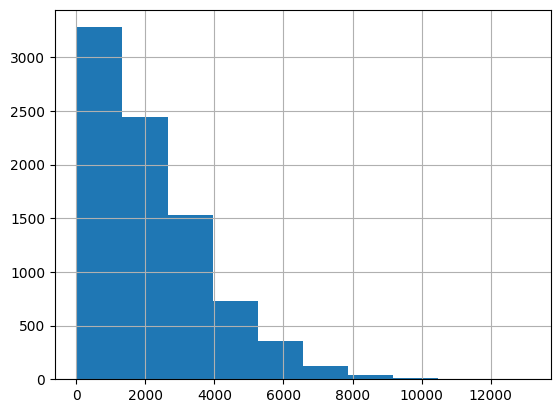

In [17]:
df_sales_hist = df_sales['Item_Outlet_Sales'].hist()

/tmp/ipython-input-2770058650.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_xticklabels(g.ax.get_xticklabels() ,rotation=30 ,  ha='right')


[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

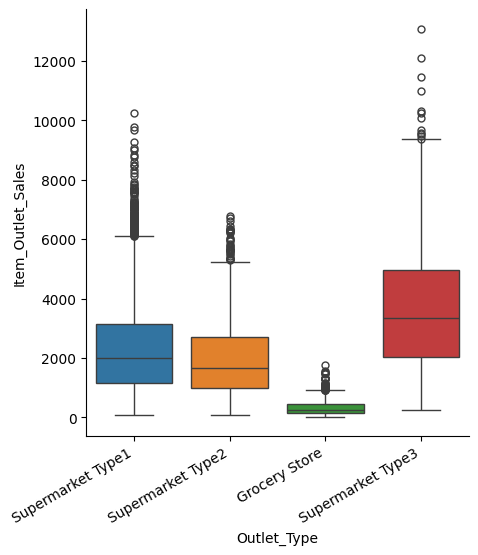

In [38]:
g = sns.catplot(data = df_sales , x='Outlet_Type', y='Item_Outlet_Sales' , kind='box' , hue='Outlet_Type' )
g.ax.set_title('')
g.ax.set_xticklabels(g.ax.get_xticklabels() ,rotation=30 ,  ha='right')

/tmp/ipython-input-2294593972.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 30 , ha='right')


[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

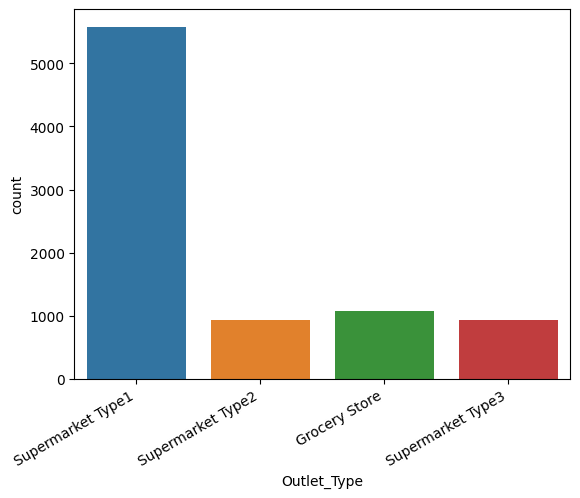

In [37]:
ax = sns.countplot(data=df_sales , x='Outlet_Type' , hue='Outlet_Type' )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30 , ha='right')

/tmp/ipython-input-2593059005.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 30 , ha='right')


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

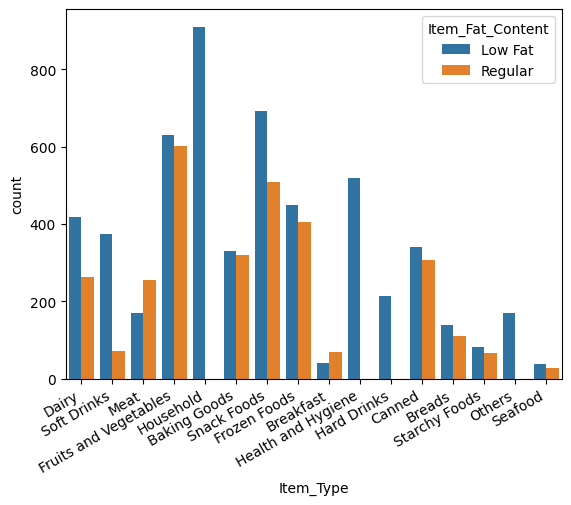

In [43]:
ax = sns.countplot(data=df_sales , x='Item_Type' , hue='Item_Fat_Content' )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30 , ha='right')

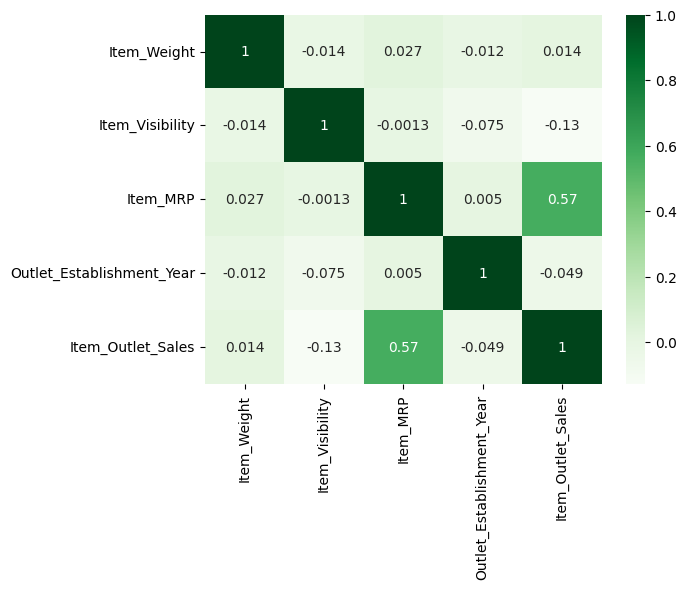

In [45]:
Hmap = df_sales.corr(numeric_only=True)
ax = sns.heatmap(Hmap , cmap='Greens' , annot=True)